In [1]:
# import needed modules

import quandl

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

selected = ['FixedRets', 'YieldRets', 'GrowthRets', 'BalancedRets']

In [2]:
#Importing csv files with data from funds
Balanced = pd.read_csv('UBS (Lux) Strategy Fund - Balanced (EUR) P-acc.csv') 
Fixed = pd.read_csv('UBS (Lux) Strategy Fund - Fixed Income (EUR) P-acc.csv')
Yield = pd.read_csv('UBS (Lux) Strategy Fund - Yield (EUR) P-acc.csv')
Growth = pd.read_csv('UBS (Lux) Strategy Fund - Growth (EUR) P-acc.csv')
#BalancedReturns = Balanced.sort_values(by ='Date', ascending = True)
Balanced['Date'] = pd.to_datetime(Balanced['Date'], format='%d/%m/%Y')
Fixed['Date'] = pd.to_datetime(Fixed['Date'], format='%d/%m/%Y')
Yield['Date'] = pd.to_datetime(Yield['Date'], format='%d/%m/%Y')
Growth['Date'] = pd.to_datetime(Growth['Date'], format='%d/%m/%Y')

In [3]:
#Adjusting returns that will be later used and extracted into new dataframe
Balanced['BalancedRets'] = Balanced['Net asset values in currency of account (EUR)'].pct_change()
Fixed['FixedRets'] = Fixed['Net asset values in currency of account (EUR)'].pct_change()
Yield['YieldRets'] = Yield['Net asset values in currency of account (EUR)'].pct_change()
Growth['GrowthRets'] = Growth['Net asset values in currency of account (EUR)'].pct_change()

In [51]:
Bal = Balanced['BalancedRets'].dropna()
Fix = Fixed['FixedRets'].dropna()
Yie = Yield['YieldRets'].dropna()
Gro = Growth['GrowthRets'].dropna()

#CumulativeReturns are in this case similar to just printing Adj.close price.
CumulativeReturnsBal = ((1+Bal).cumprod()-1)
CumulativeReturnsFix = ((1+Fix).cumprod()-1)
CumulativeReturnsYie = ((1+Yie).cumprod()-1)
CumulativeReturnsGro = ((1+Gro).cumprod()-1)

In [52]:
df = pd.concat([Fixed, Yie, Gro, Bal],axis=1)

In [53]:
data = df.drop(["Net asset values in currency of account (EUR)"],axis=1).dropna()
data.head()

,Date,FixedRets,YieldRets,GrowthRets,BalancedRets
1,1992-11-30,0.003331,0.003622,0.002424,0.012307
2,1992-12-30,0.009162,-0.007746,-0.019642,-0.031304
3,1993-01-29,0.006096,0.007917,0.004148,0.000442
4,1993-02-26,0.035919,0.026226,0.037460,0.008708
5,1993-03-31,0.010010,0.008422,0.012160,-0.003844


In [54]:

# reorganise data pulled by setting date as index with

# columns of tickers and their corresponding adjusted prices

table = data.set_index('Date')


,FixedRets,YieldRets,GrowthRets,BalancedRets
Date,,,,
1992-11-30,0.003331,0.003622,0.002424,0.012307
1992-12-30,0.009162,-0.007746,-0.019642,-0.031304
1993-01-29,0.006096,0.007917,0.004148,0.000442
1993-02-26,0.035919,0.026226,0.037460,0.008708
1993-03-31,0.010010,0.008422,0.012160,-0.003844


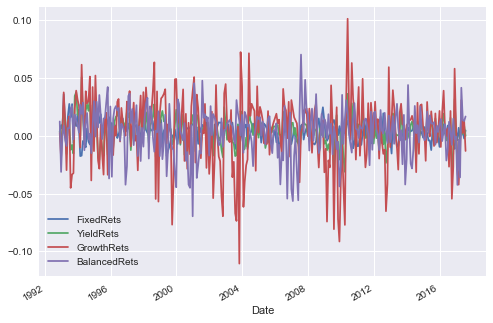

In [57]:
table.plot()
table.head()

CumulativeReturnsBal = ((1+Bal).cumprod()-1)
CumulativeReturnsFix = ((1+Fix).cumprod()-1)
CumulativeReturnsYie = ((1+Yie).cumprod()-1)
CumulativeReturnsGro = ((1+Gro).cumprod()-1)

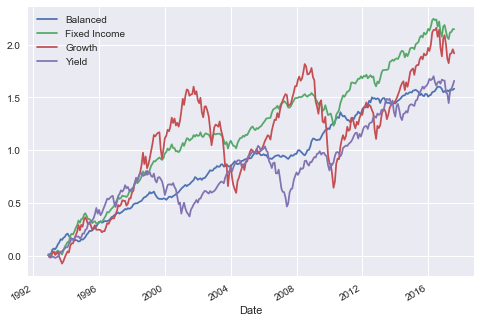

In [74]:
((1+table).cumprod()-1).plot()

plt.gca().legend(('Balanced','Fixed Income','Growth','Yield' ))

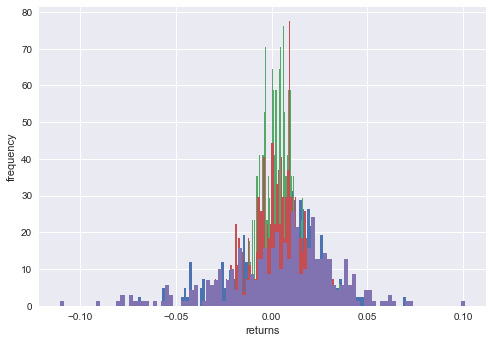

In [68]:
plt.hist(Bal, bins=100, density=True)
plt.hist(Fix, bins=100, density=True)
plt.hist(Yie, bins=100, density=True)
plt.hist(Gro, bins=100, density=True)

plt.xlabel('returns')
plt.ylabel('frequency')
plt.show()

In [14]:

# calculate daily and annual returns of the stocks

returns_daily = table.pct_change()

returns_annual = returns_daily.mean() * 250

In [15]:

# get daily and covariance of returns of the stock

cov_daily = returns_daily.cov().dropna()

cov_annual = cov_daily * 250

In [16]:

# empty lists to store returns, volatility and weights of imiginary portfolios

port_returns = []

port_volatility = []

stock_weights = []

In [17]:

# set the number of combinations for imaginary portfolios

num_assets = len(selected)

num_portfolios = 50000

In [30]:

# populate the empty lists with each portfolios returns,risk and weights

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [32]:

# a dictionary for Returns and Risk values of each portfolio

portfolio = {'Returns': port_returns,'Volatility': port_volatility}


In [33]:
# extend original dictionary to accomodate each ticker and weight in the portfolio

for counter,symbol in enumerate(selected):

    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [34]:

# make a nice dataframe of the extended dictionary

df = pd.DataFrame(portfolio)



# get better labels for desired arrangement of columns

column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

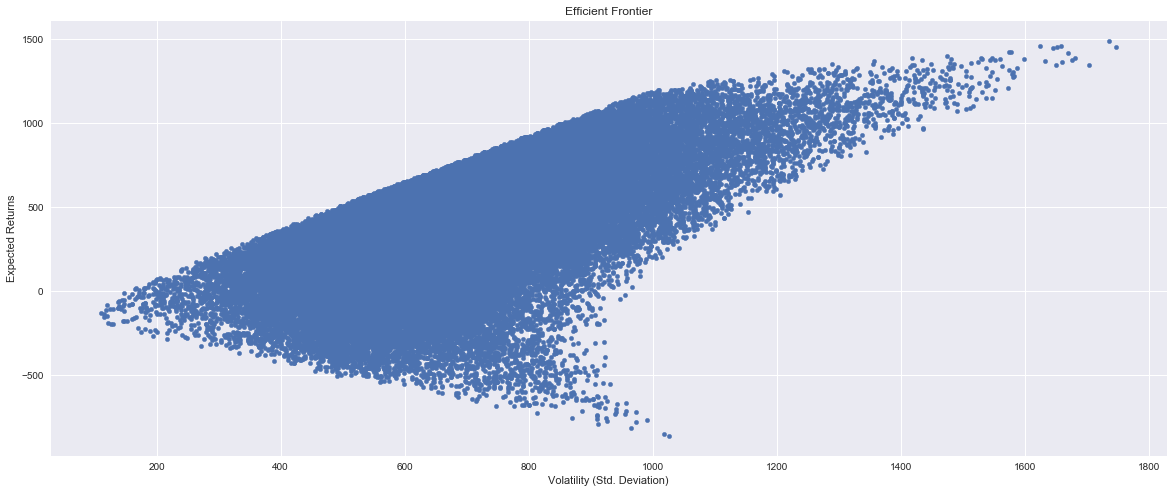

In [38]:

# reorder dataframe columns

df = df[column_order]

# plot the efficient frontier with a scatter plot

plt.style.use('seaborn')

df.plot.scatter(x='Volatility', y='Returns', figsize=(20, 8), grid=True)

plt.xlabel('Volatility (Std. Deviation)')

plt.ylabel('Expected Returns')

plt.title('Efficient Frontier')

plt.show()

In [40]:
df.head()

,Returns,Volatility,FixedRets Weight,YieldRets Weight,GrowthRets Weight,BalancedRets Weight
0,518.167427,670.533390,0.185625,0.210549,0.270832,0.332994
1,652.193699,723.779223,0.117119,0.177365,0.264239,0.441277
2,661.952268,622.649102,0.363539,0.020434,0.250998,0.365029
3,642.139740,814.230695,0.211653,0.171903,0.400478,0.215966
4,621.295639,718.769519,0.284787,0.120687,0.344667,0.249859
